In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y115.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y192.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y162.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y9.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y108.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y155.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y106.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y258.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y103.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y185.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y180.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y120.JPG
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y54.jpg
/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor/Y165.JPG
/kaggle/input/brain-tumor-dataset/bra

# **Import**

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

# **1. Data Import**

In [73]:
def get_images(directory):
    images = []
    
    for filename in os.listdir(directory):
        try:
            img = Image.open(os.path.join(directory, filename))
            img = img.resize((128, 128))
            img = img.convert('RGB')
            img = np.array(img) / 255.0 #Normalize
            images.append(img)
        except OSError as e:
            print(f"Error loading {os.path.join(directory, filename)}: {e}")
            continue
    return images

In [74]:
Tumor = get_images('/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/Tumor')
healthy = get_images('/kaggle/input/brain-tumor-dataset/brain_tumor_dataset/healthy')

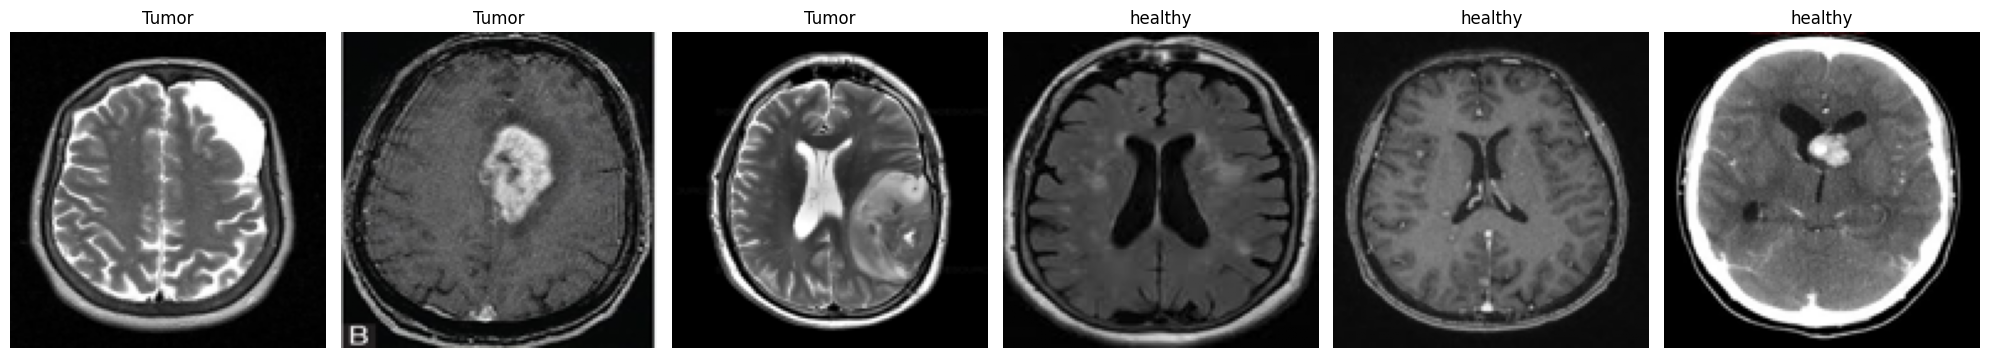

In [75]:
fig, ax = plt.subplots(1, 6, figsize=(20, 10))

ax[0].imshow(Tumor[0])
ax[1].imshow(Tumor[1])
ax[2].imshow(Tumor[2])
ax[3].imshow(healthy[0])
ax[4].imshow(healthy[1])
ax[5].imshow(healthy[2])
ax[0].set_title('Tumor')
ax[1].set_title('Tumor')
ax[2].set_title('Tumor')
ax[3].set_title('healthy')
ax[4].set_title('healthy')
ax[5].set_title('healthy')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# **2. Data Transform**

In [76]:
images = np.concatenate((Tumor, healthy))
labels = np.concatenate((np.ones(len(Tumor)), np.zeros(len(healthy))))

## **Train Test Split**

In [77]:
train_images, test_images ,train_labels ,test_labels = train_test_split(images , labels , test_size = 0.2, random_state=42, stratify=labels)

# **3. Modeling**

In [78]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(128, 128, 3), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 529ms/step - accuracy: 0.5787 - loss: 0.8036 - val_accuracy: 0.7255 - val_loss: 0.5970
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.7520 - loss: 0.5498 - val_accuracy: 0.7451 - val_loss: 0.6869
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.7993 - loss: 0.4705 - val_accuracy: 0.6275 - val_loss: 0.6059
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 496ms/step - accuracy: 0.7621 - loss: 0.5173 - val_accuracy: 0.7451 - val_loss: 0.5719
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.8069 - loss: 0.4574 - val_accuracy: 0.7451 - val_loss: 0.6386
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.8052 - loss: 0.3912 - val_accuracy: 0.7843 - val_loss: 0.6088
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.8315 - loss: 0.4348 - val_accuracy: 0.7843 - val_loss: 0.5527
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.8377 - loss: 0.3711 - val_accuracy: 0.7843 - val_loss:

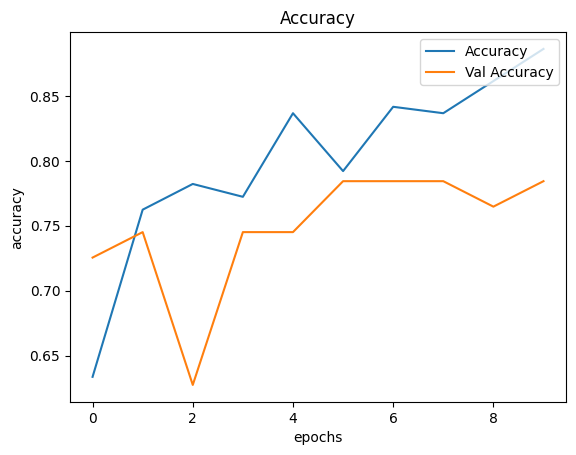

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

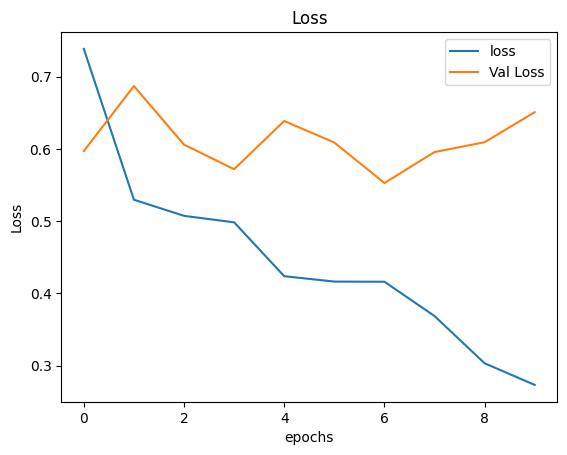

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [83]:
model.evaluate(test_images, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7729 - loss: 0.7084


[0.6508033871650696, 0.7843137383460999]

**Please leave your advice in the comments. Thank you**